# Lucia Depaoli
# 2016960

# Ex 1
- A well established and diffused method for detecting a disease in blood fails to detect the presence
of disease in $15$% of the patients that actually have the disease.
- A young UniPD startUp has developed an innovative method of screening. During the qualification
phase, a random sample of $n = 75$ patients known to have the disease is screened using the new
method.

### 1.1
What is the probability distribution of $y$, the number of times the new method fails to detect the
disease?

Binomial distribution.

### 1.2
on the $n = 75$ patients sample, the new method fails to detect the disease in $y = 6$ cases. What is
the frequentist estimator of the failure probability of the new method?

In [1]:
P_F_D <- 0.15
N = 75
y = 6
freq_est <- y/N
cat('Frequentist estimator of the failure probability: ',freq_est*100,'%')

Frequentist estimator of the failure probability:  8 %

### 1.3
Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean
value $0.15$ and standard deviation $0.14$. Plot the posterior distribution for $y$, and mark on the plot
the mean value and variance.

If we start with a $Beta$ prior and we have a $Binomial$ likelihood, the posterior is a $Beta$.

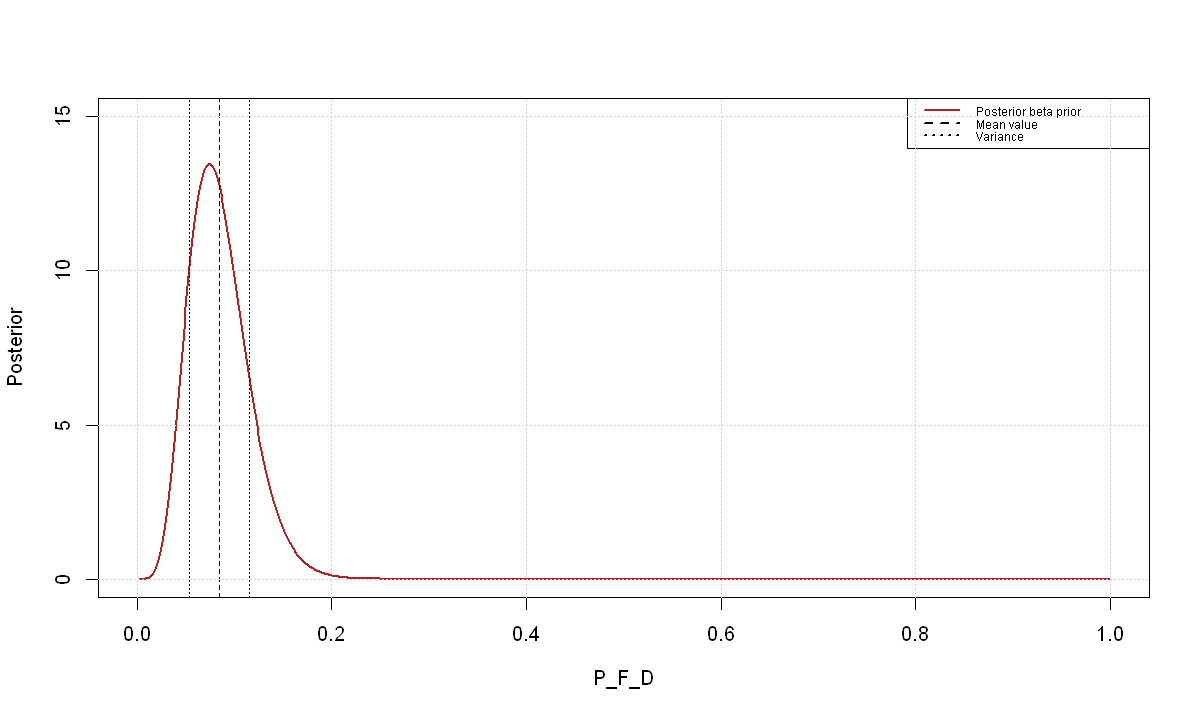

In [2]:
x <- seq(0.001,0.999,0.001)
mu <- 0.15
st <- 0.14
delta <- 1/length(x)

beta_params <- function(mu, var) {
    alpha <- ((1-mu)/var - 1/mu)*mu^2
    beta <- alpha*(1/mu - 1)
    return (c(alpha,beta))
}
ab <- beta_params(mu, st^2)

alpha <- ab[1] + y
beta <- ab[2] + N - y
posterior <- dbeta(x, alpha, beta)

post_mu <- (alpha)/(alpha + beta)
post_var <- alpha*beta/((alpha + beta)^2 * (alpha + beta + 1))
post_st <- sqrt(post_var)

options(repr.plot.width = 10, repr.plot.height = 6)

plot(x, posterior, type="l", col="firebrick",lwd=2,lty=1, 
     ylab="Posterior", xlab= expression(P_F_D) , xlim=c(0,1), ylim=c(0,15))
abline(v=post_mu, lty=2,col='black')
abline(v=post_mu - post_st, lty=3,col='black')
abline(v=post_mu + post_st, lty=3,col='black')
legend("topright", c("Posterior beta prior",'Mean value','Variance'), col=c('firebrick','black','black'),
       lwd=2, lty=c(1,2,3),cex = 0.6)
grid()

### 1.4
Perform a test of hypothesis assuming that if the probability of failing to the detect the desease
in ill patients is greater or equal than $15$%, the new test is no better that the traditional method.
Test the sample at a $5$% level of significance in the Bayesian way.

In [3]:
cat('Posterior probability: ',integrate(dbeta, shape1 = alpha, shape2 = beta, P_F_D, 1)$value * 100,'%\n')
cat('Posterior probability is less that 5%, so we reject the null hypothesis.')

Posterior probability:  3.127933 %
Posterior probability is less that 5%, so we reject the null hypothesis.

### 1.5
Perform the same hypothesis test in the classical frequentist way.

In [5]:
cat('Posterior probability: ',sum(dbinom(seq(0,y-1), N, P_F_D))* 100,'%\n')
cat('Posterior probability is less that 5%, so we reject the null hypothesis.')

Posterior probability:  2.342005 %
Posterior probability is less that 5%, so we reject the null hypothesis.

# Ex 2

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the
Poisson distribution can be very useful in applied statistics when describing low-frequency events
in a large population. In a famous example he showed that the number of deaths by horse kick
among the Prussian army follows the Poisson distribution.

Considering the following to sets of observations taken over a fixed large time interval in two different
corps:

In [6]:
n1 <- c(109, 65, 22, 3, 1, 0)
n2 <- c(144, 91, 32, 11, 2, 0)
N <- 6

### 2.1
Assuming a uniform prior, compute and plot the posterior distribution for $\lambda$, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the $95$%
credibility interval.

I assume the posterior of the first set of observations as prior for the second set of obserations.

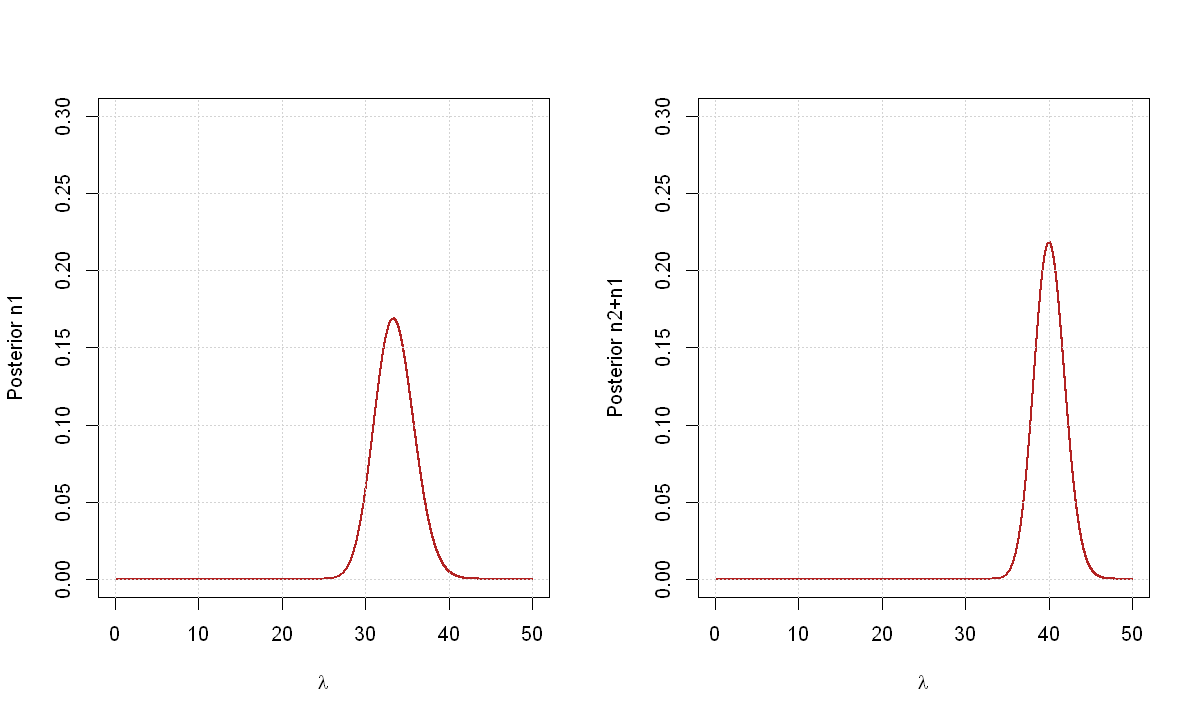

In [35]:
lambda <- seq(0, 50, by = 0.001)

n <- length(lambda)
delta_lambda <- 1/n

alpha1 <- sum(n1) + 1
lambda1 <- N
posterior_unif1 <- dgamma(x = lambda, shape = alpha1, rate = lambda1)

alpha2 <- alpha1 + sum(n2)
lambda2 <- lambda1 + N
posterior_unif2 <- dgamma(x = lambda, shape = alpha2, rate = lambda2)

options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,2))

plot(lambda, posterior_unif1, type="l", col="firebrick",lwd=2,lty=1, 
     ylab="Posterior n1", xlab= expression(lambda) , xlim=c(0,50), ylim=c(0,0.3))
grid()
plot(lambda, posterior_unif2, type="l", col="firebrick",lwd=2,lty=1, 
     ylab="Posterior n2+n1", xlab= expression(lambda) , xlim=c(0,50), ylim=c(0,0.3))
grid()

In [36]:
mediana <- function(post, delta, n, mu) {
    area <- 0
    for (i in 1:n){
        k <- i
        area <- area + sum(post[i])/sum(post)
        if(area >= 1/2) {
                break
                      }
            }
    return(mu[i])
}

# analytically
mean_unif <- alpha2 / lambda2
var_unif <- alpha2 / lambda2^2
cat('Analytically Mean: ',mean_unif,'\n')
cat('Analytically Variance: ',var_unif,'\n')

#numerically
mean_unif <- sum(lambda*posterior_unif2)/sum(posterior_unif2)
var_unif <- sum((lambda^2)*posterior_unif2/sum(posterior_unif2)) - mean_unif^2
med_unif <- mediana(post = posterior_unif2, delta = delta_lambda, n = n, mu = lambda)
cat('Numerically Mean: ',mean_unif,'\n')
cat('Numerically Variance: ',var_unif,'\n')
cat('Numerically Median: ',med_unif,'\n')

Analytically Mean:  40.08333 
Analytically Variance:  3.340278 
Numerically Mean:  40.08333 
Numerically Variance:  3.340255 
Numerically Median:  40.056 


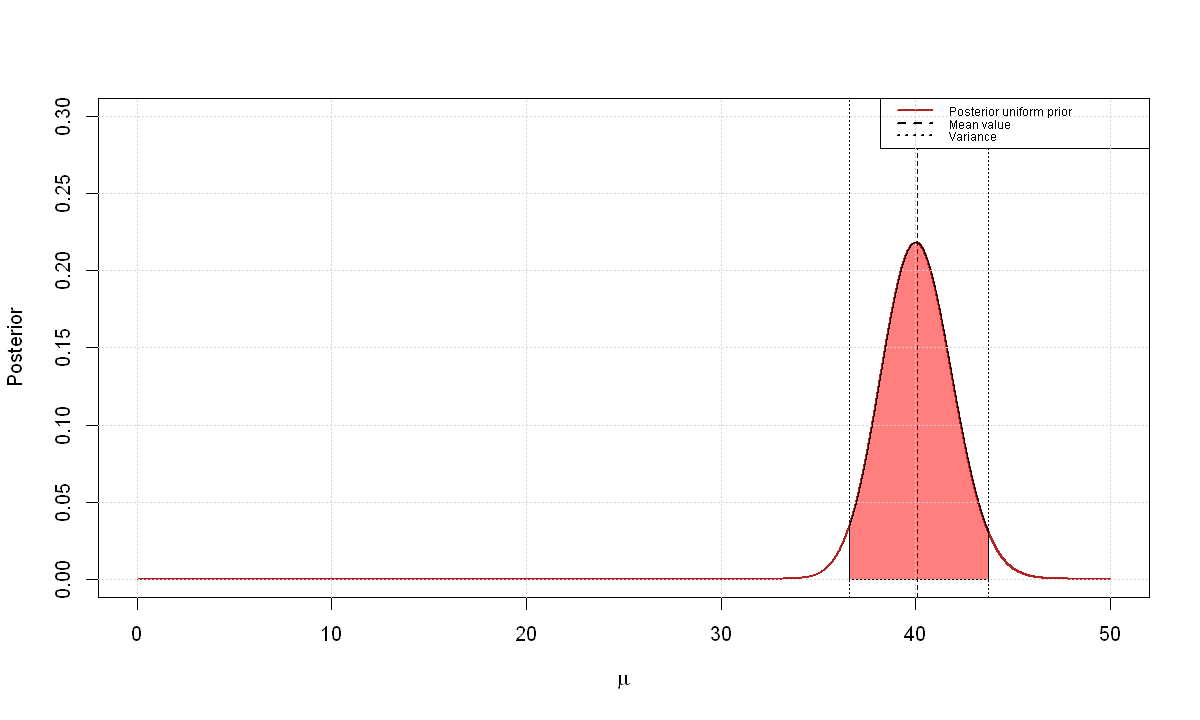

In [37]:
x1 <- lambda[tail(which(cumsum(posterior_unif2)/sum(posterior_unif2) < 0.025),1)]
x2 <- lambda[tail(which(cumsum(posterior_unif2)/sum(posterior_unif2) < 1- 0.025),1)]
xmax <- lambda[which.max(posterior_unif2)]

options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,1))

plot(lambda, posterior_unif2, type="l",col="firebrick",lwd=2,lty=1,ylim=c(0,0.3), xlim=c(0,50),
    ylab="Posterior", xlab= expression(mu))
abline(v=x1, lty=3,col='black')
abline(v=x2, lty=3,col='black')
abline(v=mean_unif, lty=2,col='black')
legend("topright", c("Posterior uniform prior",'Mean value','Variance'), col=c('firebrick','black','black'),
       lwd=2, lty=c(1,2,3),cex = 0.6)
polygon(c(lambda[lambda>=x1 & lambda<=x2], x2, x1), c(posterior_unif2[lambda>=x1 & lambda<=x2], 0, 0),
        col=rgb(1,0,0,0.5))
grid()

### 2.2
assuming now a Jeffreys' prior,

$g(\lambda) \propto 1/\sqrt(\lambda)$

compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time.
Determine the posterior mean, median and variance, and compute the $95$% credibility interval.

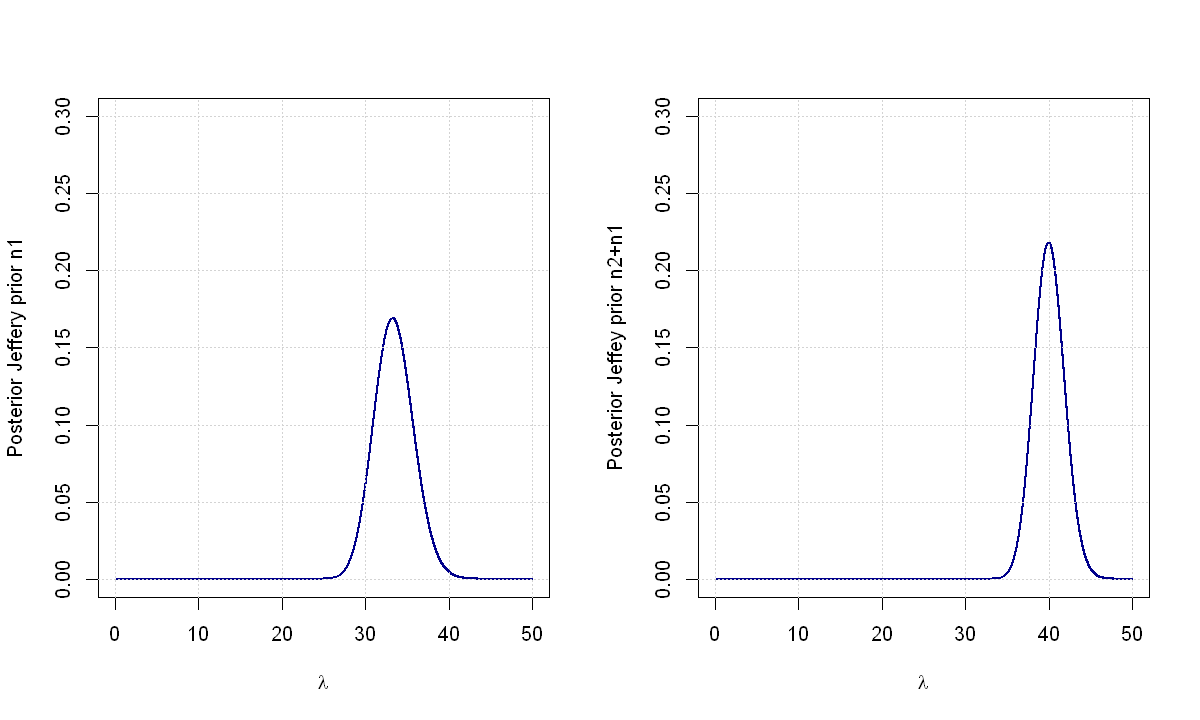

In [38]:
alpha1_jeff <- sum(n1) + 1/2
lambda1_jeff <- N
posterior_unif1_jeff <- dgamma(x = lambda, shape = alpha1_jeff, rate = lambda1_jeff)
alpha2_jeff <- alpha1_jeff + sum(n2)
lambda2_jeff <- lambda1_jeff + N
posterior_unif2_jeff <- dgamma(x = lambda, shape = alpha2_jeff, rate = lambda2_jeff)

options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,2))

plot(lambda, posterior_unif1_jeff, type="l", col="blue4",lwd=2,lty=1, 
     ylab="Posterior Jeffery prior n1", xlab= expression(lambda) , xlim=c(0,50), ylim=c(0,0.3))
grid()
plot(lambda, posterior_unif2_jeff, type="l", col="blue4",lwd=2,lty=1, 
     ylab="Posterior Jeffey prior n2+n1", xlab= expression(lambda) , xlim=c(0,50), ylim=c(0,0.3))
grid()

In [39]:
# analytically
mean_jeff <- alpha2_jeff / lambda2_jeff
var_jeff <- alpha2_jeff / lambda2_jeff^2
cat('Analytically Mean: ',mean_jeff,'\n')
cat('Analytically Variance: ',var_jeff,'\n')

#numerically
mean_jeff <- sum(lambda*posterior_unif2_jeff)/sum(posterior_unif2_jeff)
var_jeff <- sum((lambda^2)*posterior_unif2_jeff/sum(posterior_unif2_jeff)) - mean_jeff^2
med_jeff <- mediana(post = posterior_unif2_jeff, delta = delta_lambda, n = n, mu = lambda)
cat('Numerically Mean: ',mean_jeff,'\n')
cat('Numerically Variance: ',var_jeff,'\n')
cat('Numerically Median: ',med_jeff,'\n')

Analytically Mean:  40.04167 
Analytically Variance:  3.336806 
Numerically Mean:  40.04166 
Numerically Variance:  3.336785 
Numerically Median:  40.014 


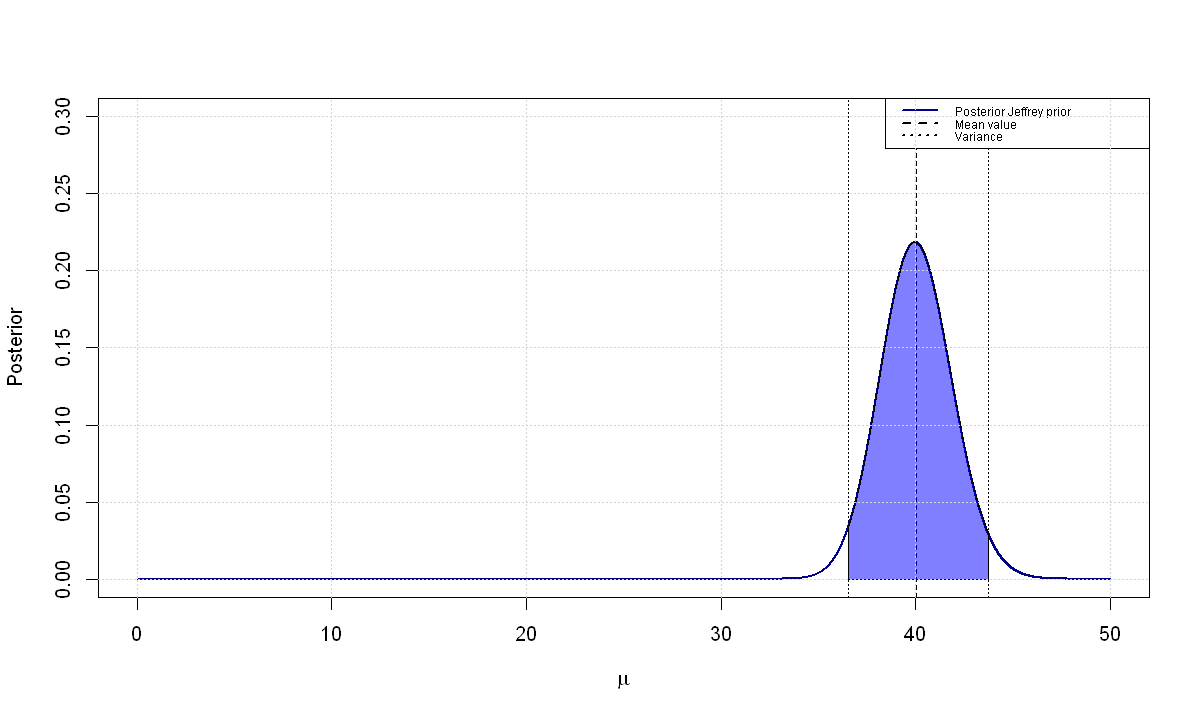

In [40]:
x1_jeff <- lambda[tail(which(cumsum(posterior_unif2_jeff)/sum(posterior_unif2_jeff) < 0.025),1)]
x2_jeff <- lambda[tail(which(cumsum(posterior_unif2_jeff)/sum(posterior_unif2_jeff) < 1- 0.025),1)]
xmax_jeff <- lambda[which.max(posterior_unif2_jeff)]

options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,1))

plot(lambda, posterior_unif2_jeff, type="l",col="blue4",lwd=2,lty=1,ylim=c(0,0.3), xlim=c(0,50),
    ylab="Posterior", xlab= expression(mu))
abline(v=x1_jeff, lty=3,col='black')
abline(v=x2_jeff, lty=3,col='black')
abline(v=mean_jeff, lty=2,col='black')
legend("topright", c("Posterior Jeffrey prior",'Mean value','Variance'), col=c('blue4','black','black'),
       lwd=2, lty=c(1,2,3),cex = 0.6)
polygon(c(lambda[lambda>=x1_jeff & lambda<=x2_jeff], x2_jeff, x1_jeff), c(posterior_unif2_jeff[lambda>=x1_jeff & lambda<=x2_jeff], 0, 0),
        col=rgb(0,0,1,0.5))
grid()

Comparison between the two different prior.

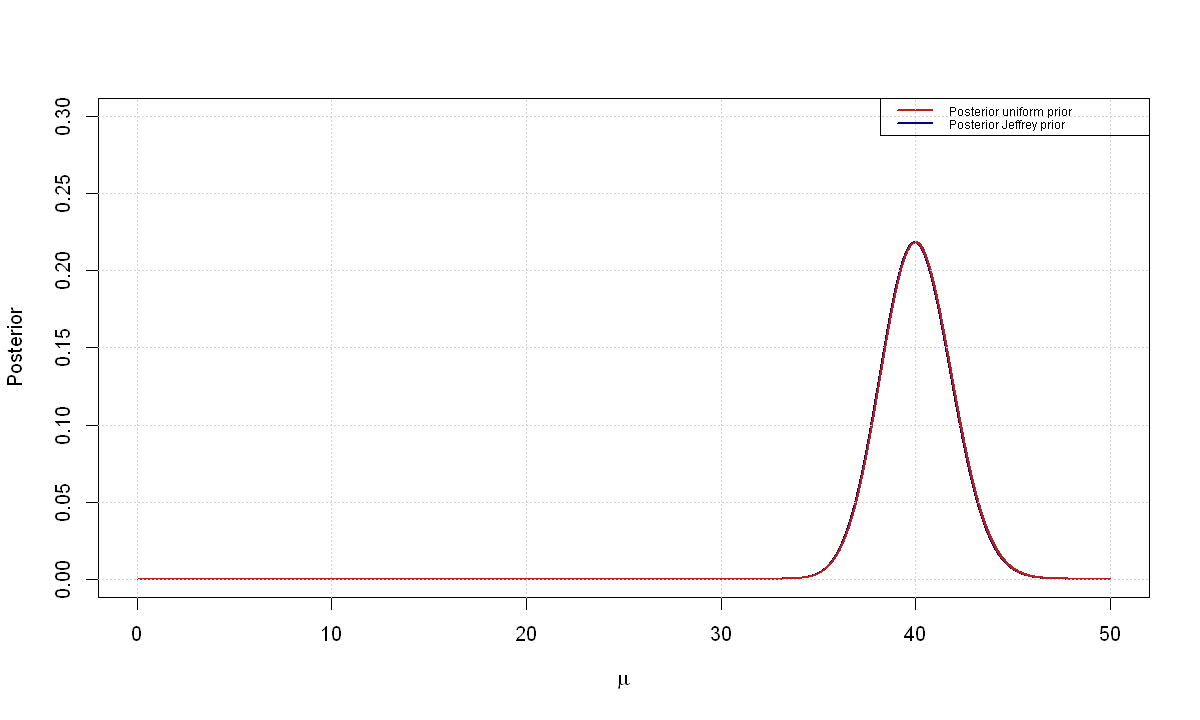

In [41]:
plot(lambda, posterior_unif2_jeff, type="l",col="blue4",lwd=2,lty=1,ylim=c(0,0.3), xlim=c(0,50),
    ylab="Posterior", xlab= expression(mu))
lines(lambda, posterior_unif2,type="l",col="firebrick",lwd=2,lty=1)
legend("topright", c("Posterior uniform prior",'Posterior Jeffrey prior'), col=c('firebrick','blue4'),
       lwd=2, lty=1,cex = 0.6)
grid()

# Ex 3
- A study on water quality of streams, a high level of bacter X was defined as a level greater than $100$
per $100$ ml of stream water. $n = 116$ samples were taken from streams having a high environmental
impact on pandas. Out of these, $y = 11$ had a high bacter X level.
- indicating with $p$ the probability that a sample of water taken from the stream has a high bacter
X level,

### 3.1
Find the frequentist estimator for $p$.

In [13]:
n <- 116
y <- 11
p <- seq(0,1,0.001)

freq_est <- y/n
cat('Frequentist estimator of the failure probability: ',freq_est*100,'%')

Frequentist estimator of the failure probability:  9.482759 %

### 3.2
Using a $Beta(1, 10)$ prior for $p$, calculate and posterior distribution $P(p|y)$.

In [14]:
alpha <- 1 + y
beta <- 10 + n - y
posterior <- dbeta(p, alpha, beta)

### 3.3
Find the bayesian estimator for $p$, the posterior mean and variance, and a $95$% credible interval.

Mean:  0.09448819 
Variance:  0.0006684388 


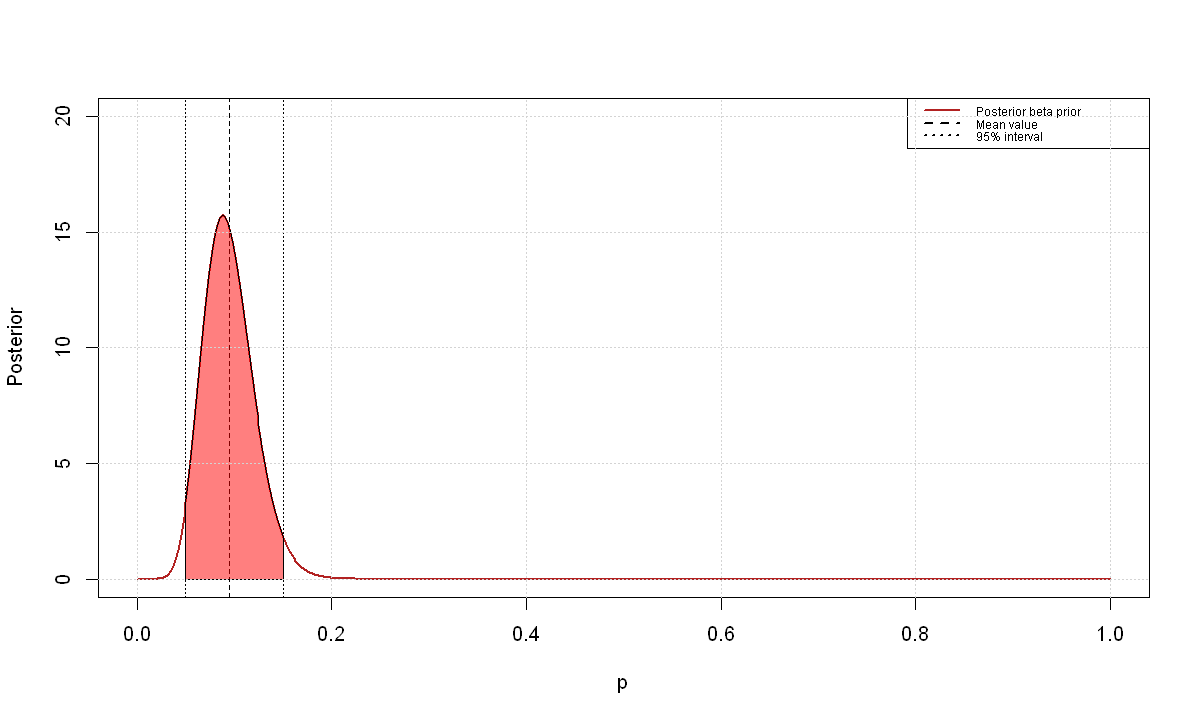

In [15]:
post_mu <- (alpha)/(alpha + beta)
post_var <- alpha*beta/((alpha + beta)^2 * (alpha + beta + 1))
cat('Mean: ',post_mu,'\n')
cat('Variance: ',post_var,'\n')

x1 <- p[tail(which(cumsum(posterior)/sum(posterior) < 0.025),1)]
x2 <- p[tail(which(cumsum(posterior)/sum(posterior) < 1- 0.025),1)]
xmax <- p[which.max(posterior)]

plot(p, posterior, type="l", col="firebrick",lwd=2,lty=1, 
     ylab="Posterior", xlab= 'p' , xlim=c(0,1), ylim=c(0,20))
abline(v=post_mu, lty=2,col='black')
abline(v=x1, lty=3,col='black')
abline(v=x2, lty=3,col='black')
legend("topright", c("Posterior beta prior",'Mean value','95% interval'), col=c('firebrick','black','black'),
       lwd=2, lty=c(1,2,3),cex = 0.6)
polygon(c(p[p>=x1 & p<=x2], x2, x1), c(posterior[p>=x1 & p<=x2], 0, 0),
        col=rgb(1,0,0,0.5))
grid()

### 3.4
test the hypotesis

$H0 : p = 0.1$

versus

$H1 : p \ne 0.1$

at $5$% level of significance with both the frequentist and bayesian approach.

In [16]:
cat('Posterior probability: ',integrate(dbeta, shape1 = alpha, shape2 = beta,0.1, 1)$value * 100,'%\n')
cat('Posterior probability is higher that 5%, so we do not reject the null hypothesis.')

Posterior probability:  38.5815 %
Posterior probability is higher that 5%, so we do not reject the null hypothesis.

In [17]:
cat('Posterior probability: ',sum(dbinom(seq(0,y-1), n, 0.1))* 100,'%\n')
cat('Posterior probability is higher that 5%, so we do not reject the null hypothesis.')

Posterior probability:  38.10246 %
Posterior probability is higher that 5%, so we do not reject the null hypothesis.

- a new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter
X level.

### 3.5
Find the frequentist estimator for $p$.

In [18]:
n <- 165
y <- 9
p <- seq(0,1,0.001)

freq_est <- y/n
cat('Frequentist estimator of the failure probability: ',freq_est*100,'%')

Frequentist estimator of the failure probability:  5.454545 %

### 3.6
Find a bayesian estimator for $p$, assuming both a $Beta(1, 10)$ prior for $p$, and assuming the posterior
probability of the older measurement as the prior for the new one.

In [19]:
alpha2 <- alpha + y
beta2 <- beta + n - y
posterior_2 <- dbeta(p, alpha2, beta2)

### 3.7
Find the bayesian estimator for $p$, the posterior mean and variance, and a $95$% credible interval.

Mean:  0.07191781 
Variance:  0.0002278008 


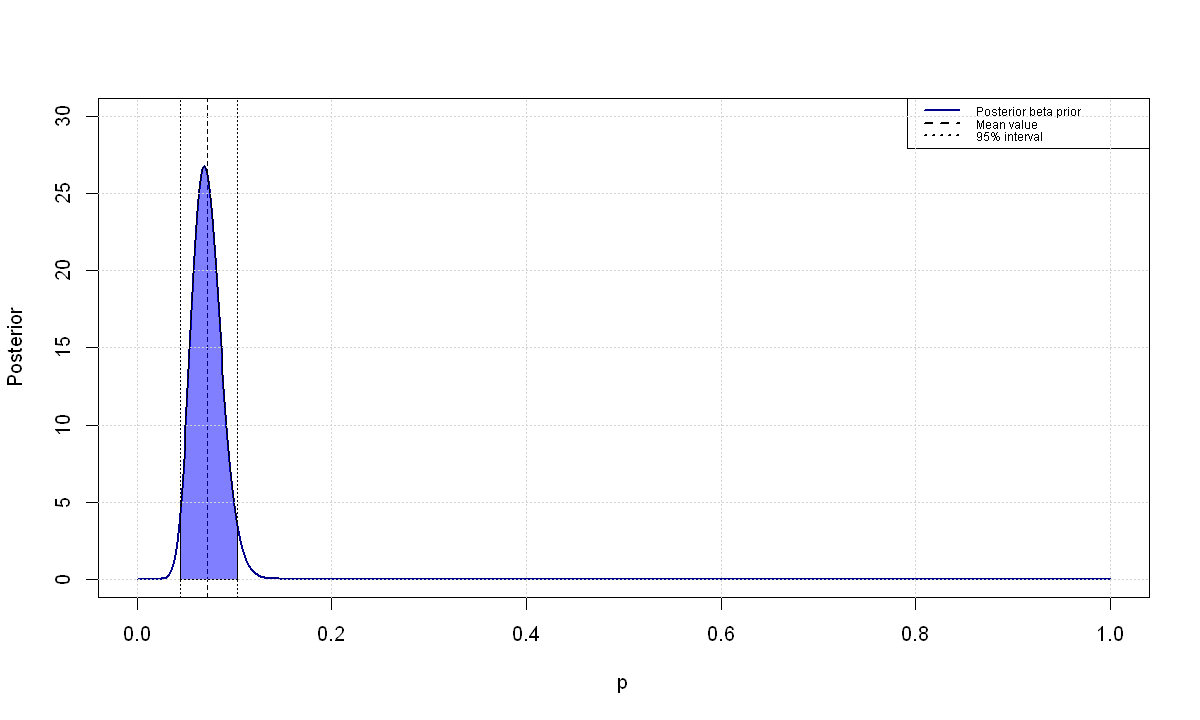

In [20]:
post_mu <- (alpha2)/(alpha2 + beta2)
post_var <- alpha2*beta2/((alpha2 + beta2)^2 * (alpha2 + beta2 + 1))
cat('Mean: ',post_mu,'\n')
cat('Variance: ',post_var,'\n')

x1 <- p[tail(which(cumsum(posterior_2)/sum(posterior_2) < 0.025),1)]
x2 <- p[tail(which(cumsum(posterior_2)/sum(posterior_2) < 1- 0.025),1)]
xmax <- p[which.max(posterior_2)]

plot(p, posterior_2, type="l", col="blue4",lwd=2,lty=1, 
     ylab="Posterior", xlab= 'p' , xlim=c(0,1), ylim=c(0,30))
abline(v=post_mu, lty=2,col='black')
abline(v=x1, lty=3,col='black')
abline(v=x2, lty=3,col='black')
legend("topright", c("Posterior beta prior",'Mean value','95% interval'), col=c('blue4','black','black'),
       lwd=2, lty=c(1,2,3),cex = 0.6)
polygon(c(p[p>=x1 & p<=x2], x2, x1), c(posterior_2[p>=x1 & p<=x2], 0, 0),
        col=rgb(0,0,1,0.5))
grid()

### 3.8
test the hypotesis

$H0 : p = 0.1$

versus

$H1 : p \ne 0.1$

at $5$% level of significance with both the frequentist and bayesian approach.

In [21]:
cat('Posterior probability: ',integrate(dbeta, shape1 = alpha2, shape2 = beta2, 0.1, 1)$value * 100,'%\n')
cat('Posterior probability is less that 5%, so we reject the null hypothesis.')

Posterior probability:  4.117008 %
Posterior probability is less that 5%, so we reject the null hypothesis.

In [22]:
cat('Posterior probability: ',sum(dbinom(seq(0,y-1), n, 0.1))* 100,'%\n')
cat('Posterior probability is less that 5%, so we reject the null hypothesis.')

Posterior probability:  1.290585 %
Posterior probability is less that 5%, so we reject the null hypothesis.